# **Proposta de Trabalho 3 - Mineração de dados**

### **Professor:** Wagner Meira Jr.
### **Aluno:** Gilliard Gabriel Rodrigues
### **Matrícula:** 2019054609


### **Tema:** Prevendo os tipos de pokémons com aprendizado de máquina
### **Base de dados:** https://www.kaggle.com/datasets/mihirbindal/the-complete-pokemon-dataset



In [2]:
#Bibliotecas usadas no projeto
#from google.colab import drive #Acesso ao google drive
from IPython.display import clear_output #Limpeza de outputs
from collections import Counter #Estrutura de dados interessante
from wordcloud import WordCloud #Nuvem de palavras


import pandas as pd #Manipulação de dados
import numpy as np #Manipulação de matrizes

import matplotlib.pyplot as plt #Visualização de dados
import seaborn as sns #Visualização de dados
import plotly.graph_objects as go #Visualização de dados
import plotly.express as px #Visualização de dados
from plotly.subplots import make_subplots #Construção de subplots

from sklearn.preprocessing import StandardScaler #Reescala de features
from sklearn.model_selection import train_test_split #Divisão em treino e teste
from sklearn.model_selection import GridSearchCV #Tunning de hiperparâmetros
from sklearn.model_selection import StratifiedKFold # Para a validação cruzada
from sklearn.tree import DecisionTreeClassifier # Classificador
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix #Para avaliar o modelo

## **2. Data understanding (Entendimento dos dados)**


In [3]:
#drive.mount('/content/drive')

In [4]:
pd.options.display.max_columns = None

In [5]:
#Carregando a base de dados
#data_path = 'drive/MyDrive/Datasets/'
data_path = 'C:/Users/User/Desktop/8º período/DM/TP3/'
df = pd.read_csv(data_path + 'pokedex.csv', delimiter=',', encoding='utf8')
print(f'O dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.')
df.head()

O dataset possui 1033 linhas e 40 colunas.


pokedex_number           name  generation   classfication  \
0               1      Bulbasaur           1    Seed Pokemon   
1               2        Ivysaur           1    Seed Pokemon   
2               3       Venusaur           1    Seed Pokemon   
3               3  Mega Venusaur           1    Seed Pokemon   
4               4     Charmander           1  Lizard Pokemon   

                     abilities  height_m  weight_kg  type1   type2  \
0  ['Overgrow', 'Chlorophyll']       0.7        6.9  Grass  Poison   
1  ['Overgrow', 'Chlorophyll']       1.0       13.0  Grass  Poison   
2  ['Overgrow', 'Chlorophyll']       2.0      100.0  Grass  Poison   
3                ['Thick Fat']       2.4      155.5  Grass  Poison   
4     ['Blaze', 'Solar Power']       0.6        8.5   Fire    None   

   base_total  hp  attack  defense  sp_attack  sp_defense  speed  against_bug  \
0         318  45      49       49         65          65     45          1.0   
1         405  60      62       63         80          80     60          1.0   
2         525  80      82       83        100         100     80          1.0   
3         625  80     100      123        122         120     80          1.0   
4         309  39      52       43         60          50     65          0.5   

   against_dark  against_dragon  against_electric  against_fairy  \
0           1.0             1.0               0.5            0.5   
1           1.0             1.0               0.5            0.5   
2           1.0             1.0               0.5            0.5   
3           1.0             1.0               0.5            0.5   
4           1.0             1.0               1.0            0.5   

   against_fighting  against_fire  against_flying  against_ghost  \
0               0.5           2.0             2.0            1.0   
1               0.5           2.0             2.0            1.0   
2               0.5           2.0             2.0            1.0   
3               0.5           1.0             2.0            1.0   
4               1.0           0.5             1.0            1.0   

   against_grass  against_ground  against_ice  against_normal  against_poison  \
0           0.25             1.0          2.0             1.0             1.0   
1           0.25             1.0          2.0             1.0             1.0   
2           0.25             1.0          2.0             1.0             1.0   
3           0.25             1.0          1.0             1.0             1.0   
4           0.50             2.0          0.5             1.0             1.0   

   against_psychic  against_rock  against_steel  against_water capture_rate  \
0              2.0           1.0            1.0            0.5           45   
1              2.0           1.0            1.0            0.5           45   
2              2.0           1.0            1.0            0.5           45   
3              2.0           1.0            1.0            0.5           45   
4              1.0           2.0            0.5            2.0           45   

  base_egg_steps  base_happiness  is_legendary  is_mythical  is_mega  
0          5,140            70.0             0            0        0  
1          5,140            70.0             0            0        0  
2          5,140            70.0             0            0        0  
3          5,140            70.0             0            0        1  
4          5,140            70.0             0            0        0

Vamos dar uma olhada nos dados:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 40 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pokedex_number    1033 non-null   int64  
 1   name              1033 non-null   object 
 2   generation        1033 non-null   int64  
 3   classfication     1033 non-null   object 
 4   abilities         1033 non-null   object 
 5   height_m          1033 non-null   float64
 6   weight_kg         1033 non-null   float64
 7   type1             1033 non-null   object 
 8   type2             1033 non-null   object 
 9   base_total        1033 non-null   int64  
 10  hp                1033 non-null   int64  
 11  attack            1033 non-null   int64  
 12  defense           1033 non-null   int64  
 13  sp_attack         1033 non-null   int64  
 14  sp_defense        1033 non-null   int64  
 15  speed             1033 non-null   int64  
 16  against_bug       1033 non-null   float64


- A maioria das características dos pokémons é numérica, apenas as seguintes são categóricas: nome, classificação, habilidades, primeiro e segundo tipo, taxa de captura e nº de passos necessários para chocar ovo. 

Esses dois últimos não fazem muito sentido não serem numéricos, se analisarmos os valores possíveis, veremos que na verdade são numéricos, mas estão representados como string por conta do uso de vírgula como separador de milhar, assim como alguns casos de string vazia:

In [7]:
df['capture_rate'].unique()

array(['45', '255', '120', '127', '90', '190', '75', '235', '150', '25',
       '170', '50', '200', '100', '180', '60', '225', '30', '35', '3',
       '65', '70', '125', '205', '155', '5', '145', '130', '140', ' ',
       '15', '220', '160', '80', '55', '10', nan], dtype=object)

In [8]:
df['base_egg_steps'].unique()

array(['5,140', '3,855', '2,570', '6,425', '10,280', '1,285', '8,995',
       '7,710', '20,560', '30,840', '5140', nan], dtype=object)

Vamos corrigir esses dados:

In [9]:
df['capture_rate'] = [np.nan if (rate == ' ' or rate is np.nan) else float(rate) for rate in df['capture_rate']]

In [10]:
df['base_egg_steps'] = [float(num_steps.replace(',', '')) if num_steps is not np.nan else np.nan for num_steps in df['base_egg_steps']]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 40 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pokedex_number    1033 non-null   int64  
 1   name              1033 non-null   object 
 2   generation        1033 non-null   int64  
 3   classfication     1033 non-null   object 
 4   abilities         1033 non-null   object 
 5   height_m          1033 non-null   float64
 6   weight_kg         1033 non-null   float64
 7   type1             1033 non-null   object 
 8   type2             1033 non-null   object 
 9   base_total        1033 non-null   int64  
 10  hp                1033 non-null   int64  
 11  attack            1033 non-null   int64  
 12  defense           1033 non-null   int64  
 13  sp_attack         1033 non-null   int64  
 14  sp_defense        1033 non-null   int64  
 15  speed             1033 non-null   int64  
 16  against_bug       1033 non-null   float64


- As colunas 'capture_rate', 'base_egg_steps', 'base_happiness' possuem alguns valores nulos, vamos dar uma olhada neles:

In [12]:
df[df['capture_rate'].isnull() | df['base_egg_steps'].isnull() | df['base_happiness'].isnull()][['name', 'capture_rate', 'base_egg_steps', 'base_happiness']]

name  capture_rate  base_egg_steps  base_happiness
642          Galarian Darumaka           NaN          5140.0            70.0
1024                   Wyrdeer           NaN             NaN             NaN
1025                   Kleavor           NaN             NaN             NaN
1026                  Ursaluna           NaN             NaN             NaN
1027          Basculegion male           NaN             NaN             NaN
1028        Basculegion female           NaN             NaN             NaN
1029                  Sneasler           NaN             NaN             NaN
1030                  Overqwil           NaN             NaN             NaN
1031  Enamorus Incarnate Forme           NaN             NaN             NaN
1032    Enamorus Therian Forme           NaN             NaN             NaN

Como são poucos dados e a maioria se trata de formas exclusivas da região de Hisui, então através de uma rápida pesquisa na internet é possível obter quais são os valores para essas _features_:

In [13]:
df.loc[df['name'] == 'Galarian Darumaka','capture_rate'] = 120
df.loc[df['name'] == 'Wyrdeer','capture_rate'] = 45
df.loc[df['name'] == 'Kleavor','capture_rate'] = 15
df.loc[df['name'] == 'Ursaluna','capture_rate'] = 20
df.loc[df['name'] == 'Basculegion male','capture_rate'] = 45
df.loc[df['name'] == 'Basculegion female','capture_rate'] = 45
df.loc[df['name'] == 'Sneasler','capture_rate'] = 45 
df.loc[df['name'] == 'Overqwil','capture_rate'] = 45
df.loc[df['name'] == 'Enamorus Incarnate Forme','capture_rate'] = 3
df.loc[df['name'] == 'Enamorus Therian Forme','capture_rate'] = 3

In [14]:
df.loc[df['name'] == 'Wyrdeer','base_egg_steps'] = 5120
df.loc[df['name'] == 'Kleavor','base_egg_steps'] = 6400 
df.loc[df['name'] == 'Ursaluna','base_egg_steps'] = 5120
df.loc[df['name'] == 'Basculegion male','base_egg_steps'] = 10240
df.loc[df['name'] == 'Basculegion female','base_egg_steps'] = 10240
df.loc[df['name'] == 'Sneasler','base_egg_steps'] = 5120 
df.loc[df['name'] == 'Overqwil','base_egg_steps'] = 5120
df.loc[df['name'] == 'Enamorus Incarnate Forme','base_egg_steps'] = 30720
df.loc[df['name'] == 'Enamorus Therian Forme','base_egg_steps'] = 30720

In [15]:
df.loc[df['name'] == 'Wyrdeer','base_happiness'] = 70
df.loc[df['name'] == 'Kleavor','base_happiness'] = 70 
df.loc[df['name'] == 'Ursaluna','base_happiness'] = 70
df.loc[df['name'] == 'Basculegion male','base_happiness'] = 70
df.loc[df['name'] == 'Basculegion female','base_happiness'] = 70
df.loc[df['name'] == 'Sneasler','base_happiness'] = 35 
df.loc[df['name'] == 'Overqwil','base_happiness'] = 70
df.loc[df['name'] == 'Enamorus Incarnate Forme','base_happiness'] = 90
df.loc[df['name'] == 'Enamorus Therian Forme','base_happiness'] = 90

Agora que tratamos os valores nulos, vamos dar uma olhada em algumas métricas de centralidade:

In [16]:
df.describe().T

count         mean          std      min     25%     50%  \
pokedex_number    1033.0   445.513069   264.067993     1.00   218.0   442.0   
generation        1033.0     4.102614     2.277103     1.00     2.0     4.0   
height_m          1033.0     1.292546     1.393469     0.10     0.6     1.0   
weight_kg         1033.0    78.750339   280.940149     0.10     9.0    29.9   
base_total        1033.0   439.348500   120.388810   175.00   330.0   460.0   
hp                1033.0    70.165537    26.243506     1.00    50.0    68.0   
attack            1033.0    80.722168    32.671451     5.00    55.0    78.0   
defense           1033.0    74.462730    30.842605     5.00    50.0    70.0   
sp_attack         1033.0    73.047435    32.798018    10.00    50.0    65.0   
sp_defense        1033.0    72.090029    27.546378    20.00    50.0    70.0   
speed             1033.0    68.838335    30.123647     5.00    45.0    65.0   
against_bug       1033.0     0.999758     0.614889     0.00     0.5     1.0   
against_dark      1033.0     1.067038     0.464897     0.25     1.0     1.0   
against_dragon    1033.0     0.972894     0.380917     0.00     1.0     1.0   
against_electric  1033.0     1.040900     0.644340     0.00     0.5     1.0   
against_fairy     1033.0     1.092207     0.533885     0.00     1.0     1.0   
against_fighting  1033.0     1.078170     0.753946     0.00     0.5     1.0   
against_fire      1033.0     1.121007     0.701690     0.00     0.5     1.0   
against_flying    1033.0     1.162633     0.583861     0.25     1.0     1.0   
against_ghost     1033.0     1.014037     0.568510     0.00     1.0     1.0   
against_grass     1033.0     1.010165     0.746207     0.00     0.5     1.0   
against_ground    1033.0     1.078654     0.781274     0.00     0.5     1.0   
against_ice       1033.0     1.193611     0.756970     0.00     0.5     1.0   
against_normal    1033.0     0.871975     0.282750     0.00     1.0     1.0   
against_poison    1033.0     0.956438     0.545564     0.00     0.5     1.0   
against_psychic   1033.0     0.977977     0.509656     0.00     1.0     1.0   
against_rock      1033.0     1.239109     0.699401     0.25     1.0     1.0   
against_steel     1033.0     0.991530     0.516551     0.00     0.5     1.0   
against_water     1033.0     1.052759     0.612965     0.00     0.5     1.0   
capture_rate      1033.0    92.618587    75.998239     3.00    45.0    60.0   
base_egg_steps    1033.0  8086.505324  7810.580619  1285.00  5140.0  5140.0   
base_happiness    1033.0    62.700871    21.865838     0.00    70.0    70.0   
is_legendary      1033.0     0.081317     0.273453     0.00     0.0     0.0   
is_mythical       1033.0     0.029042     0.168005     0.00     0.0     0.0   
is_mega           1033.0     0.044530     0.206370     0.00     0.0     0.0   

                     75%      max  
pokedex_number     674.0    905.0  
generation           6.0      8.0  
height_m             1.6     20.0  
weight_kg           75.0   8091.1  
base_total         517.0    780.0  
hp                  82.0    255.0  
attack             100.0    190.0  
defense             90.0    230.0  
sp_attack           95.0    194.0  
sp_defense          90.0    230.0  
speed               90.0    200.0  
against_bug          1.0      4.0  
against_dark         1.0      4.0  
against_dragon       1.0      2.0  
against_electric     1.0      4.0  
against_fairy        1.0      4.0  
against_fighting     2.0      4.0  
against_fire         1.5      4.0  
against_flying       1.0      4.0  
against_ghost        1.0      4.0  
against_grass        1.0      4.0  
against_ground       1.0      4.0  
against_ice          2.0      4.0  
against_normal       1.0      1.0  
against_poison       1.0      4.0  
against_psychic      1.0      4.0  
against_rock         2.0      4.0  
against_steel        1.0      4.0  
against_water        1.0      4.0  
capture_rate       127.0    255.0  
base_egg_steps    6425.0  30840.0  
base_happiness      70

In [17]:
df.head(3)

pokedex_number       name  generation classfication  \
0               1  Bulbasaur           1  Seed Pokemon   
1               2    Ivysaur           1  Seed Pokemon   
2               3   Venusaur           1  Seed Pokemon   

                     abilities  height_m  weight_kg  type1   type2  \
0  ['Overgrow', 'Chlorophyll']       0.7        6.9  Grass  Poison   
1  ['Overgrow', 'Chlorophyll']       1.0       13.0  Grass  Poison   
2  ['Overgrow', 'Chlorophyll']       2.0      100.0  Grass  Poison   

   base_total  hp  attack  defense  sp_attack  sp_defense  speed  against_bug  \
0         318  45      49       49         65          65     45          1.0   
1         405  60      62       63         80          80     60          1.0   
2         525  80      82       83        100         100     80          1.0   

   against_dark  against_dragon  against_electric  against_fairy  \
0           1.0             1.0               0.5            0.5   
1           1.0             1.0               0.5            0.5   
2           1.0             1.0               0.5            0.5   

   against_fighting  against_fire  against_flying  against_ghost  \
0               0.5           2.0             2.0            1.0   
1               0.5           2.0             2.0            1.0   
2               0.5           2.0             2.0            1.0   

   against_grass  against_ground  against_ice  against_normal  against_poison  \
0           0.25             1.0          2.0             1.0             1.0   
1           0.25             1.0          2.0             1.0             1.0   
2           0.25             1.0          2.0             1.0             1.0   

   against_psychic  against_rock  against_steel  against_water  capture_rate  \
0              2.0           1.0            1.0            0.5          45.0   
1              2.0           1.0            1.0            0.5          45.0   
2              2.0           1.0            1.0            0.5          45.0   

   base_egg_steps  base_happiness  is_legendary  is_mythical  is_mega  
0          5140.0            70.0             0            0        0  
1          5140.0            70.0             0            0        0  
2          5140.0            70.0             0            0        0

A seguir vamos responder algumas perguntas interessantes pelos dados:

#### Existem quantos pokémons de cada tipo?

In [18]:
type1_count = Counter(df['type1']) # Contando o número de pokémons para cada primeiro tipo possível
type2_count = Counter(df['type2']) # Contando o número de pokémons para cada segundo tipo possível

del type2_count['None'] # Desconsiderando as contagens de segundo tipo vazio
type_count = type1_count + type2_count # Unindo as contagens a fim de considerar a frequência independentemente de ser primeiro ou segundo tipo
sorted_type_count = dict(type_count.most_common()) # Ordenando do maior para o menor

In [19]:
types = [element[0] for element in sorted_type_count.items()]
values = [element[1] for element in sorted_type_count.items()]

fig = go.Figure(go.Bar(
            y=types[::-1],
            x=values[::-1],
            orientation='h',
            marker=dict(color = values, colorscale='viridis')))
fig.update_layout({'plot_bgcolor': 'rgba(0,0,0,0)',
                   'paper_bgcolor': 'rgba(0,0,0,0)'},
                  width=600,
                  height=500,
                  title_text="<b>Número de pokémons por tipo:<b>",
                  font_family="Montserrat",
                  font_color="black",
                  title_font_family="Century Gothic",
                  font_size=13)
fig.update_xaxes(showgrid=False)
fig.show()

Como podemos ver, os 3 tipos mais comuns são água, normal e voador, enquanto os 3 tipos com menos pokémons são gelo, fantasma e fada.

#### Existem quantos pokémons lendários por tipo? E míticos?

In [20]:
legendary = df[df['is_legendary'] == 1]

legendary_type1_count = Counter(legendary['type1'])
legendary_type2_count = Counter(legendary['type2'])

del legendary_type2_count['None']
legendary_type_count = legendary_type1_count + legendary_type2_count 

sorted_legendary_type_count = dict(legendary_type_count.most_common())

In [21]:
mythical = df[df['is_mythical'] == 1]

mythical_type1_count = Counter(mythical['type1'])
mythical_type2_count = Counter(mythical['type2'])


del mythical_type2_count['None']
mythical_type_count = mythical_type1_count + mythical_type2_count 

sorted_mythical_type_count = dict(mythical_type_count.most_common())

In [22]:
types_of_legendary = [element[0] for element in sorted_legendary_type_count.items()]
values_of_legendary = [element[1] for element in sorted_legendary_type_count.items()]
types_of_mythical = [element[0] for element in sorted_mythical_type_count.items()]
values_of_mythical = [element[1] for element in sorted_mythical_type_count.items()]

fig = make_subplots(rows=1, cols=2, subplot_titles=("<b>Número de pokémons lendários por tipo:<b>", "<b>Número de pokémons míticos por tipo:<b>"))

fig.add_trace(
    go.Bar(y=types_of_legendary[::-1], x=values_of_legendary[::-1], orientation='h', 
                     marker=dict(color = values_of_legendary, colorscale='viridis')),
    row=1, col=1
)
fig.add_trace(
    go.Bar(y=types_of_mythical[::-1], x=values_of_mythical[::-1], orientation='h', 
                     marker=dict(color = values_of_mythical, colorscale='viridis')),
    row=1, col=2
)
fig.update_layout({'plot_bgcolor': 'rgba(0,0,0,0)',
                   'paper_bgcolor': 'rgba(0,0,0,0)'},
                  width=1200,
                  height=500,
                  font_family="Century Gothic Medium",
                  font_color="black",
                  title_font_family="Century Gothic",
                  font_size=13,
                  showlegend=False)
fig.update_xaxes(showgrid=False)
fig.show()

Como podemos ver, o tipo mais comum entre os lendários e também os míticos é o psíquico. O tipo inseto não é contemplado por nenhum lendário, apenas pokémons míticos e os demais.  

#### Como é a proporção de pokémons que possuem apenas um tipo e aqueles que possuem dois?

In [23]:
fig = go.Figure(data=[go.Pie(pull=[0.01, 0], textinfo='value+percent', labels=['Um tipo', 'Dois tipos'], 
                             values=[df[df['type2'] == 'None'].shape[0], df[df['type2'] != 'None'].shape[0]], 
                             marker_colors=['#fde725', '#3e4989'])])
fig.update_layout({'plot_bgcolor': 'rgba(0,0,0,0)',
                   'paper_bgcolor': 'rgba(0,0,0,0)'},
                  width=500, height=400)
fig.show()

In [24]:
labels = ['Um tipo', 'Dois tipos']
values = [df[df['type2'] == 'None'].shape[0], df[df['type2'] != 'None'].shape[0]]
data = pd.DataFrame({'Nº de tipos': labels, 'Quantidade': values})
fig = px.bar(data, x="Nº de tipos", y="Quantidade", orientation='v', color_discrete_sequence =['#3e4989'], text_auto=True)
fig.update_layout({'plot_bgcolor': 'rgba(0,0,0,0)',
                   'paper_bgcolor': 'rgba(0,0,0,0)'},
                  height=400, width=500)
fig.update_xaxes(title='')
fig.show()

Como podemos ver, a proporção de pokémons com um e com dois tipos é razoavelmente equilibrada.

#### Quais as combinações de tipos mais comuns?

In [26]:
type_combinations_df = df.loc[df['type2'] != 'None', ['type1', 'type2']]
type_combinations = ["+".join(combination) for _, combination in type_combinations_df.iterrows()]

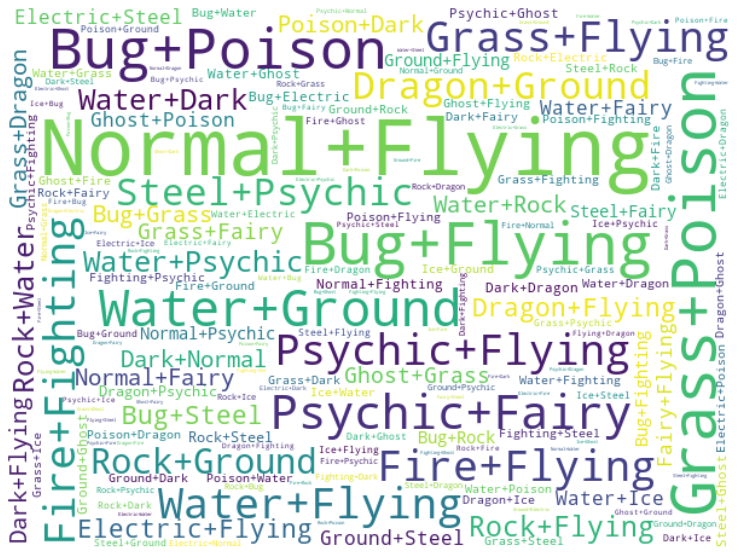

In [28]:
wordcloud = WordCloud(width = 600, height = 450, background_color="white").generate_from_frequencies(Counter(type_combinations))

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file('wordcloud.png')

Como podemos notar na nuvem de palavras acima, a combinação de tipos mais comum é normal + voador. Outras combinações bem populares são grama + venenoso e inseto + voador.

#### Qual tipo possui, em média, os pokémons mais fortes? E os mais fracos?

Para responder essa pergunta, consideraremos a média da soma dos atributos de cada pokémon, ou seja: a média da _feature_ _base_total_ para cada tipo.

In [81]:
types = df['type1'].unique().tolist()
average_base_total = [df.loc[(df['type1'] == pokemon_type) | (df['type2'] == pokemon_type), 'base_total'].mean() for pokemon_type in types]

data = {key: value for key, value in zip(types, average_base_total)}
sorted_data = dict(sorted(data.items(), key=lambda x:x[1]))

In [84]:
keys = list(sorted_data.keys())
values = list(sorted_data.values())

fig = go.Figure(go.Bar(
            y=keys,
            x=values,
            orientation='h',
            marker=dict(color = values, colorscale='viridis')))
fig.update_layout({'plot_bgcolor': 'rgba(0,0,0,0)',
                   'paper_bgcolor': 'rgba(0,0,0,0)'},
                  width=600,
                  height=500,
                  title_text="<b>Ranking de força por tipo (em termos de atributos base):<b>",
                  font_family="Century Gothic Medium",
                  font_color="black",
                  title_font_family="Century Gothic",
                  font_size=13)
fig.update_xaxes(showgrid=False)

Como podemos ver, o tipo que possui, em média, os pokémons mais fortes é o tipo Dragão, enquanto o que possui os pokémons mais fracos é o tipo Inseto.

A seguir é possível avaliar os atributos separadamente para cada tipo:

In [104]:
types = keys[::-1] # Pegando a lista de tipos já ordenada do mais forte para o mais fraco
stats = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']

num_rows = 3
num_cols = 6   
index = 0
fig = make_subplots(rows=num_rows, cols=num_cols, specs=[[{"type": "polar"}]*num_cols]*num_rows,
                   subplot_titles=types)
for row in range(num_rows):
    pokemons = df.loc[(df['type1'] == types[index]) | (df['type2'] == types[index]), stats]
    average_stats = pokemons.mean()
    for column in range(num_cols):
        fig.add_trace(go.Scatterpolar(r=average_stats.values, theta=average_stats.index, name=types[index], fill='toself'),
                      row=row+1, col=column+1)
        index += 1
fig.update_polars(radialaxis=dict(visible=True,range=[50, 110]), bgcolor='#CAD5CF')
fig.update_layout({'plot_bgcolor': 'rgba(0,0,0,0)',
                   'paper_bgcolor': 'rgba(0,0,0,0)'}, height=850, width=1700, showlegend=False, template="none", font_family="Century Gothic Medium",
                  font_color="black", title_font_family="Century Gothic")       
fig.show()

Como é possível ver, os tipos mais fortes se destacam nos atributos de ataque e ataque especial, seguido pelos pontos de vida.

#### Quais são os dez pokémons mais resistentes a outros tipos? E os dez menos resistentes?

In [105]:
df['against_fire'].unique()

array([2.  , 1.  , 0.5 , 0.25, 4.  , 0.  , 1.5 , 1.25])

Partiremos das seguintes premissas:
- Se a coluna _against_[...] possuir um valor de pelo menos 1.25, aquele tipo possui vantagem em relação ao pokémon em questão.
- Se o valor for 1, significa que aquele tipo não possui relação de vantagem, desvantagem ou imunidade contra o pokémon em questão.
- Se o valor for 0 significa que aquele tipo não possui efeito no pokémon em questão, ou seja, o pokémon é imune àquele tipo.
- Se o valor for abaixo de 0, significa que aquele tipo possui desvantagem em relação ao pokémon em questão.

In [107]:
against_type_columns = ['against_bug', 'against_dark', 'against_dragon', 'against_electric', 'against_fairy', 'against_fighting', 
                   'against_fire', 'against_flying', 'against_ghost', 'against_grass', 'against_ground', 'against_ice',
                   'against_normal', 'against_poison', 'against_psychic', 'against_rock', 'against_steel', 'against_water']

df['sum_of_against_columns'] = df[against_type_columns].sum(axis=1)

In [108]:
ten_most_resistant = df.sort_values(by='sum_of_against_columns')[['name', 'sum_of_against_columns']].head(10).reset_index()
ten_most_resistant['position'] = [str(i + 1) + 'º colocado'for i in ten_most_resistant.index]
print('Dez pokémons mais resistentes:')
ten_most_resistant[['name', 'position']].style.hide_index()

Dez pokémons mais resistentes:


C:\Users\User\AppData\Local\Temp\ipykernel_14572\2169421353.py:4: FutureWarning:

this method is deprecated in favour of `Styler.hide(axis='index')`



Como podemos ver, o pokémon que possui mais resistência a tipos é o Shedinja, seguido pelo Zacian na sua forma 'Crowned Sword' e o Mega Mawile. 

No caso do Shedinja, vale lembrar que trata-se do pokémon com o menor HP de todos (como é possível ver abaixo), mas em contrapartida conta com uma habilidade (Wonder Guard) que garante que ele que só receba dano através de golpes super-efetivos, Entry Hazzards (Spikes, Stealth Rock), efeitos climáticos (Sandstorm, Hail) ou status (Burn, Poison, Badly Poison).

In [110]:
shedinja_stats = df.loc[df['name'] == 'Shedinja', stats]
zacian_crowned_sword_stats = df.loc[df['name'] == 'Zacian Crowned Sword', stats]
mega_mawile_stats = df.loc[df['name'] == 'Mega Mawile', stats]

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=zacian_crowned_sword_stats.iloc[0].tolist(),
      theta=stats,
      fill='toself',
      name='Zacian Crowned Sword',
      marker_color='grey',
      hovertemplate = '%{theta}: %{r}<extra></extra>'
))
fig.add_trace(go.Scatterpolar(
      r=mega_mawile_stats.iloc[0].tolist(),
      theta=stats,
      fill='toself',
      name='Mega Mawile',
      marker_color='pink',
      hovertemplate = '%{theta}: %{r}<extra></extra>'
))
fig.add_trace(go.Scatterpolar(
      r=shedinja_stats.iloc[0].tolist(),
      theta=stats,
      fill='toself',
      name='Shedinja', 
      marker_color='green',
      hovertemplate = '%{theta}: %{r}<extra></extra>'
))

fig.update_polars(radialaxis=dict(visible=True))
fig.update_layout({'plot_bgcolor': 'rgba(0,0,0,0)',
                   'paper_bgcolor': 'rgba(0,0,0,0)'},width=600, height=600, showlegend=True, template="none", font_family="Century Gothic Medium",
                  font_color="black", title_font_family="Century Gothic")       
fig.show()

Uma vez que o Shedinja é o pokémon que possui resistência ao maior número de tipos, tendo fraqueza apenas aos tipos fogo, voador, pedra, fantasma e noturno, ele tomará dano apenas de pokémons desse tipo. No entanto, se compararmos seus atributos com os do segundo e terceiro pokémons mais resistentes, veremos que ele não é tão forte apesar de sua particularidade.

In [111]:
ten_least_resistant = df.sort_values(by='sum_of_against_columns')[['name', 'sum_of_against_columns']].tail(10).iloc[::-1].reset_index()
ten_least_resistant['position'] = [str(i + 1) + 'º colocado'for i in ten_least_resistant.index]
print('Dez pokémons menos resistentes:')
ten_least_resistant[['name', 'position']].style.hide_index()

Dez pokémons menos resistentes:


C:\Users\User\AppData\Local\Temp\ipykernel_14572\602263749.py:4: FutureWarning:

this method is deprecated in favour of `Styler.hide(axis='index')`



Aqui é mais interessante ver a lista de tipos aos quais os 3 pokémons menos resistentes possuem fraquezas:

In [112]:
aurorus = df.loc[df['name'] == 'Aurorus', against_type_columns]
aurorus.loc[:, aurorus.gt(1.0).all()]

against_fighting  against_grass  against_ground  against_rock  \
801               4.0            2.0             2.0           2.0   

     against_steel  against_water  
801            4.0            2.0

Como podemos ver, Aurorus tem fraqueza a 6 tipos, sendo 2 deles tipos que dão dano multiplicado por 4.

In [113]:
amaura = df.loc[df['name'] == 'Amaura', against_type_columns]
amaura.loc[:, amaura.gt(1.0).all()]

against_fighting  against_grass  against_ground  against_rock  \
800               4.0            2.0             2.0           2.0   

     against_steel  against_water  
800            4.0            2.0

Amaura, que é a pré-evolução de Aurorus, também possui fraqueza a 6 tipos, sendo 2 deles tipos que dão dano multiplicado por 4.



In [114]:
sewaddle = df.loc[df['name'] == 'Sewaddle', against_type_columns]
sewaddle.loc[:, sewaddle.gt(1.0).all()]

against_bug  against_fire  against_flying  against_ice  against_poison  \
626          2.0           4.0             4.0          2.0             2.0   

     against_rock  
626           2.0

Amaura também possui fraqueza a 6 tipos, sendo 2 deles tipos que dão dano multiplicado por 4.

#### Quais os 10 pokémons mais fortes em termos de soma dos atributos base?

In [115]:
df[['name', 'type1', 'type2', 'base_total']].sort_values(by='base_total', ascending=False).reset_index(drop=True).head(10)

name     type1     type2  base_total
0            Mega Mewtwo X   Psychic  Fighting         780
1            Mega Rayquaza    Dragon    Flying         780
2            Mega Mewtwo Y   Psychic      None         780
3           Primal Groudon    Ground      Fire         770
4            Primal Kyogre     Water      None         770
5           Ultra Necrozma   Psychic    Dragon         754
6     Zacian Crowned Sword     Fairy     Steel         720
7  ZamazentaCrowned Shield  Fighting     Steel         720
8                   Arceus    Normal      None         720
9   Zygarde Complete Forme    Dragon    Ground         708

Como podemos ver, as mega-evoluções dominam o top 3, sendo formas que agregam bastante poder aos pokémons que as possui.

#### Qual geração possui, em média, os pokémons mais fortes? E os mais fracos?


In [116]:
generations = df['generation'].unique().tolist()

average_base_total = [df.loc[(df['generation'] == generation), 'base_total'].mean() for generation in generations]

data = {key: value for key, value in zip(generations, average_base_total)}
sorted_data = dict(sorted(data.items(), key=lambda x:x[1]))

In [121]:
keys = list([str(n) + 'º geração' for n in sorted_data.keys()])
values = list(sorted_data.values())
fig = go.Figure(go.Bar(
            y=keys,
            x=values,
            orientation='h',
            marker=dict(color = values, colorscale='viridis')))
fig.update_layout({'plot_bgcolor': 'rgba(0,0,0,0)',
                   'paper_bgcolor': 'rgba(0,0,0,0)'},
                  width=600,
                  height=500,
                  title_text="<b>Ranking de força por geração (em termos de atributos base):<b>",
                  font_family="Century Gothic Medium",
                  font_color="black",
                  title_font_family="Century Gothic",
                  font_size=13)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Como podemos ver, a geração que possui, em média, os pokémons mais fortes – em termos de atributos base – é a 7ª (região de Alola) e a que possui os mais fracos é a 2ª (região de Johto).

A seguir é possível avaliar os atributos separadamente para cada tipo:

In [123]:
generations = df['generation'].unique().tolist()
labels = list([str(n) + 'º geração' for n in generations])
stats = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']

num_rows = 2
num_cols = 4   
index = 0
fig = make_subplots(rows=num_rows, cols=num_cols, specs=[[{"type": "polar"}]*num_cols]*num_rows,
                   subplot_titles=labels)
for row in range(num_rows):
    pokemons = df.loc[(df['generation'] == generations[index]), stats]
    average_stats = pokemons.mean()
    for column in range(num_cols):
        fig.add_trace(go.Scatterpolar(r=average_stats.values, theta=average_stats.index, name=labels[index], 
                                      hovertemplate = 'Média: %{r}<br>Atributo: %{theta}<extra></extra>', fill='toself'),
                      row=row+1, col=column+1)
        index += 1
fig.update_polars(radialaxis=dict(visible=True), bgcolor='#CAD5CF')
fig.update_layout({'plot_bgcolor': 'rgba(0,0,0,0)',
                   'paper_bgcolor': 'rgba(0,0,0,0)'},
                  height=850, width=1650, showlegend=False, template="none", font_family="Century Gothic Medium",
                  font_color="black", title_font_family="Century Gothic")       
fig.show()

#### Quais os 5 pokémons mais fortes em cada atributo?

In [124]:
attributes = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']

for attribute in attributes:
  print('\n' + attribute.upper() + ':')
  display(df[['name', attribute]].sort_values(by=attribute, ascending=False).head().reset_index(drop=True))


HP:


name   hp
0                 Blissey  255
1                 Chansey  250
2                Guzzlord  223
3  Zygarde Complete Forme  216
4               Regidrago  200


ATTACK:


name  attack
0       Mega Mewtwo X     190
1      Mega Heracross     185
2             Kartana     181
3  DeoxysAttack Forme     180
4      Primal Groudon     180


DEFENSE:


name  defense
0       Shuckle      230
1  Mega Steelix      230
2   Mega Aggron      230
3     Stakataka      211
4      Regirock      200


SP_ATTACK:


name  sp_attack
0       Mega Mewtwo Y        194
1       Primal Kyogre        180
2       Mega Rayquaza        180
3  DeoxysAttack Forme        180
4       Mega Alakazam        175


SP_DEFENSE:


name  sp_defense
0               Shuckle         230
1                Regice         200
2         Primal Kyogre         160
3  Deoxys Defense Forme         160
4                 Lugia         154


SPEED:


name  speed
0           Regieleki    200
1  Deoxys Speed Forme    180
2             Ninjask    160
3           Pheromosa    151
4       Mega Alakazam    150

É interessante observar que o _Shuckle_ é o pokémon que possui tanto a maior **defesa** quanto a maior **defesa especial**. Além disso, os pódios são compostos, majoritariamente, por pokémons lendários ou míticos.

## **3. Data preparation (Preparação dos dados)**

O objetivo aqui será classificar o tipo primário de um pokémon baseado em suas demais características.

Primeiro, vamos extrair a variável target na sua forma original. Como o DecisionTreeClassifier() do Scikit-learn não exige que seja numérico, não precisamos fazer o OHE ou LabelEncoding.

In [125]:
y = df.loc[:,'type1'].copy()
y

0        Grass
1        Grass
2        Grass
3        Grass
4         Fire
         ...  
1028     Water
1029    Poison
1030      Dark
1031     Fairy
1032     Fairy
Name: type1, Length: 1033, dtype: object

Além de fazer One-hot Encoding das _features_ categóricas a serem utilizadas para treinar o modelo, faremos na variável 'type1' apenas para ter como comparar a correlação de cada _feature_ com os _dummies_ representando cada classe possível:

In [126]:
df = pd.get_dummies(df, columns=['type1', 'type2'])

In [127]:
df.head(1)

pokedex_number       name  generation classfication  \
0               1  Bulbasaur           1  Seed Pokemon   

                     abilities  height_m  weight_kg  base_total  hp  attack  \
0  ['Overgrow', 'Chlorophyll']       0.7        6.9         318  45      49   

   defense  sp_attack  sp_defense  speed  against_bug  against_dark  \
0       49         65          65     45          1.0           1.0   

   against_dragon  against_electric  against_fairy  against_fighting  \
0             1.0               0.5            0.5               0.5   

   against_fire  against_flying  against_ghost  against_grass  against_ground  \
0           2.0             2.0            1.0           0.25             1.0   

   against_ice  against_normal  against_poison  against_psychic  against_rock  \
0          2.0             1.0             1.0              2.0           1.0   

   against_steel  against_water  capture_rate  base_egg_steps  base_happiness  \
0            1.0            0.5          45.0          5140.0            70.0   

   is_legendary  is_mythical  is_mega  sum_of_against_columns  type1_Bug  \
0             0            0        0                   19.25          0   

   type1_Dark  type1_Dragon  type1_Electric  type1_Fairy  type1_Fighting  \
0           0             0               0            0               0   

   type1_Fire  type1_Flying  type1_Ghost  type1_Grass  type1_Ground  \
0           0             0            0            1             0   

   type1_Ice  type1_Normal  type1_Poison  type1_Psychic  type1_Rock  \
0          0             0             0              0           0   

   type1_Steel  type1_Water  type2_Bug  type2_Dark  type2_Dragon  \
0            0            0          0           0             0   

   type2_Electric  type2_Fairy  type2_Fighting  type2_Fire  type2_Flying  \
0               0            0               0           0             0   

   type2_Ghost  type2_Grass  type2_Ground  type2_Ice  type2_None  \
0            0            0             0          0           0   

   type2_Normal  type2_Poison  type2_Psychic  type2_Rock  type2_Steel  \
0             0             1              0           0            0   

   type2_Water  
0            0

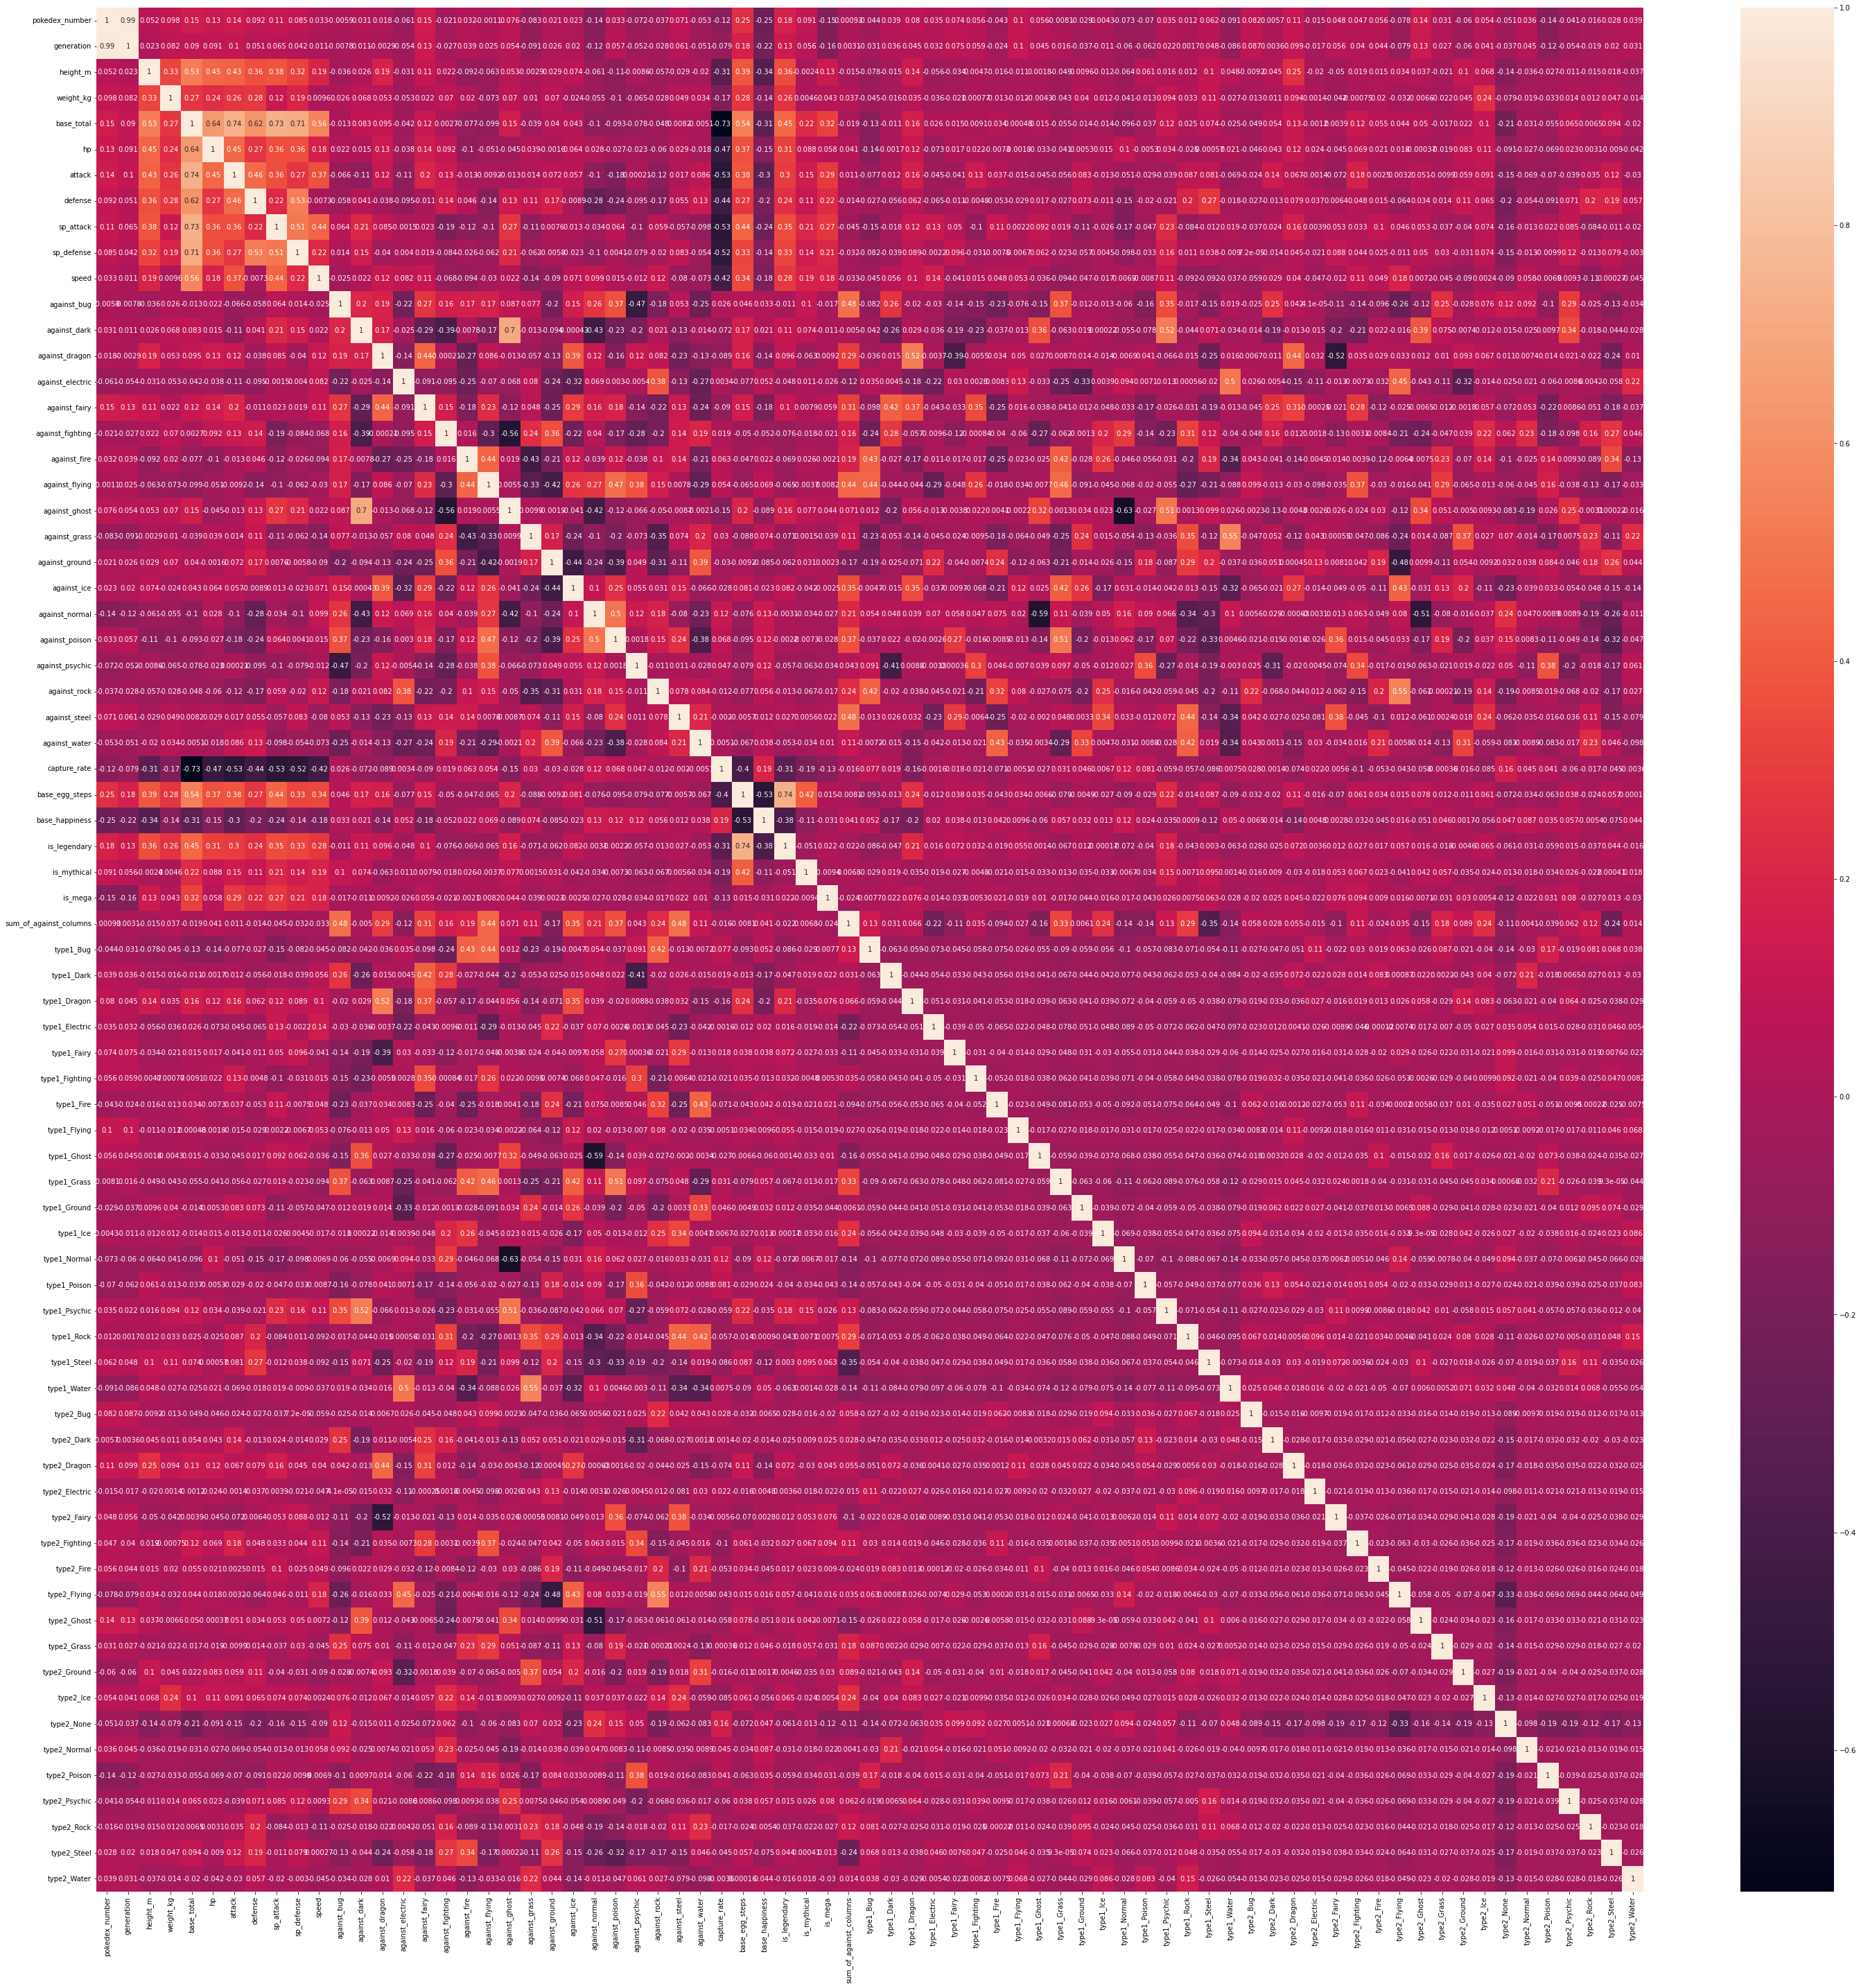

In [128]:
corr_matrix= df.corr() 

plt.figure(figsize=(50, 50))
sns.heatmap(corr_matrix, annot=True)
plt.show()

As _features_ relativas às habilidades e às classificações dos pokémons não serão consideradas por assumirem centenas de valores possíveis e, consequentemente, implicarem centenas de novas _features_ após o One-hot Encoding. As _features_ relativas aos nomes, nº da pokedex e geração não devem ser consideradas pois não é conhecido que essas características não influenciam o tipo. Além disso, as _features_ relativas à altura, peso, se é mega-evolução, taxa de captura e felicidade base não serão consideradas por terem baixíssima correlação com os tipos. Por último, sobre o tipo secundário, serão considerados apenas aqueles que possuem uma correlação considerável em relação aos tipos primários, lembrando dos segundos tipos mais recorrentes segundo a análise exploratória.

Vamos separar as _features_ que usaremos:

In [129]:
X = df[['against_bug', 'against_dark','against_dragon', 'against_electric', 'against_fairy','against_fighting', 
        'against_fire', 'against_flying', 'against_ghost', 'against_grass', 'against_ground', 'against_ice', 
        'against_normal', 'against_poison', 'against_psychic', 'against_rock', 'against_steel', 'against_water',
        'type2_Fighting', 'type2_Flying', 'type2_Ground', 'type2_Poison', 'type2_Psychic', 'type2_Water', 
        'is_legendary', 'base_egg_steps', 'sp_attack', 'defense']].copy()
X.head()

against_bug  against_dark  against_dragon  against_electric  against_fairy  \
0          1.0           1.0             1.0               0.5            0.5   
1          1.0           1.0             1.0               0.5            0.5   
2          1.0           1.0             1.0               0.5            0.5   
3          1.0           1.0             1.0               0.5            0.5   
4          0.5           1.0             1.0               1.0            0.5   

   against_fighting  against_fire  against_flying  against_ghost  \
0               0.5           2.0             2.0            1.0   
1               0.5           2.0             2.0            1.0   
2               0.5           2.0             2.0            1.0   
3               0.5           1.0             2.0            1.0   
4               1.0           0.5             1.0            1.0   

   against_grass  against_ground  against_ice  against_normal  against_poison  \
0           0.25             1.0          2.0             1.0             1.0   
1           0.25             1.0          2.0             1.0             1.0   
2           0.25             1.0          2.0             1.0             1.0   
3           0.25             1.0          1.0             1.0             1.0   
4           0.50             2.0          0.5             1.0             1.0   

   against_psychic  against_rock  against_steel  against_water  \
0              2.0           1.0            1.0            0.5   
1              2.0           1.0            1.0            0.5   
2              2.0           1.0            1.0            0.5   
3              2.0           1.0            1.0            0.5   
4              1.0           2.0            0.5            2.0   

   type2_Fighting  type2_Flying  type2_Ground  type2_Poison  type2_Psychic  \
0               0             0             0             1              0   
1               0             0             0             1              0   
2               0             0             0             1              0   
3               0             0             0             1              0   
4               0             0             0             0              0   

   type2_Water  is_legendary  base_egg_steps  sp_attack  defense  
0            0             0          5140.0         65       49  
1            0             0          5140.0         80       63  
2            0             0          5140.0        100       83  
3            0             0          5140.0        122      123  
4            0             0          5140.0         60       43

In [130]:
y.head()

0    Grass
1    Grass
2    Grass
3    Grass
4     Fire
Name: type1, dtype: object

## **4. Modeling (Modelagem)**

Por lidar bem com classificação multi-class, possuir uma alta explicabilidade e a lógica por trás dessa técnica ser especialmente conveniente para algumas _features_ que temos nos dados (informações de efetividade de tipos contra cada pokémon e segundo tipo), o modelo de aprendizado de máquina supervisionado escolhido aqui será o de Árvores de Decisão.

Uma vez que essa técnica não é sensitiva à variância dos dados, não será necessário reescalar os dados. Portanto, vamos dividí-los em dados de treino e teste:

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)
print(f'O tamanho do conjunto de treino é de {len(X_train)} linhas e o conjunto de teste possui {len(X_test)}.')

O tamanho do conjunto de treino é de 826 linhas e o conjunto de teste possui 207.


Vamos utilizar o GridSearchCV para fazer a validação cruzada e o _tunning_ do modelo:

In [132]:
tree_params = [{'criterion': ['gini', 'entropy'], 'max_depth': range(1, 21)}]
model = GridSearchCV(DecisionTreeClassifier(random_state = 16),
                     tree_params,
                     cv=4,
                     refit=True)
model.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=16),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(1, 21)}])

Vamos ver quais foram os melhores parâmetros e a acurácia no conjunto de treino:

In [133]:
model.best_params_

{'criterion': 'gini', 'max_depth': 13}

In [134]:
model.score(X_train, y_train)

0.9842615012106537

Agora vamos aplicar o modelo no conjunto de teste para que na próxima seção possamos avaliar outras métricas:

In [135]:
y_pred = model.predict(X_test)

## **5. Evaluation (Validação)**


In [136]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, zero_division=0))
print(f'Acurácia no conjunto de treino: {model.score(X_train, y_train)}')
print(f'Acurácia no conjunto de teste: {model.score(X_test, y_test)}')

              precision    recall  f1-score   support

         Bug       0.75      1.00      0.86        12
        Dark       1.00      0.57      0.73        14
      Dragon       0.90      1.00      0.95         9
    Electric       1.00      0.90      0.95        10
       Fairy       0.86      1.00      0.92         6
    Fighting       1.00      0.89      0.94         9
        Fire       0.85      0.92      0.88        12
      Flying       1.00      0.33      0.50         3
       Ghost       1.00      0.83      0.91         6
       Grass       1.00      1.00      1.00        20
      Ground       0.73      1.00      0.85        11
         Ice       0.75      0.75      0.75         8
      Normal       1.00      1.00      1.00        23
      Poison       0.82      1.00      0.90         9
     Psychic       1.00      1.00      1.00        16
        Rock       0.89      1.00      0.94         8
       Steel       1.00      0.62      0.77         8
       Water       1.00    

Em geral, todos os tipos primários tiveram uma precisão e revocação muito elevadas, fazendo com que o modelo tenha alcançado um resultado interessante. A acurácia em treino e teste também foram muito satisfatórias.

Vamos exportar uma imagem contendo a árvore de decisões gerada e também ver quais foram as _features_ mais importantes para o modelo:

In [138]:
import graphviz
from sklearn.tree import plot_tree, export_graphviz

dot_data = export_graphviz(model.best_estimator_,
                           out_file = None,
                           feature_names = X_train.columns,
                           precision=2,
                           filled=True,
                           class_names=['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire', 'Flying', 'Ghost',
                                        'Grass', 'Ground', 'Ice', 'Normal', 'Poison', 'Psychic', 'Rock', 'Steel', 'Water'],
                           leaves_parallel=False)
graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render('dtree_render',view=True)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [ ]:
features_importance_dic = {'score': model.best_estimator_.feature_importances_, 'features': X_train.columns}
features_importance_df = pd.DataFrame(features_importance_dic).sort_values('score', ascending=False).reset_index(drop=True)
features_importance_df